## Track feature encoder using an Autoencoder

We used simple feed forward netural network to create an autoencoder that will reduce the dimension of song feature list from more than 20 to 8

#### Importing necessary libraries for this notebook

In [1]:
import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle

In [2]:
track_pd = pd.read_csv("D:\Recommendation RL\Code\Data\sampled_track_features_data.csv")
track_pd.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_3c2c29b5-c738-42c0-83e1-ee0e88ac834d,182.293335,1969,99.987810,0.198284,0.336354,0.353215,0.395759,6.443376,0.338417,...,4,0.377411,0.083737,-0.306129,0.045954,0.078400,0.666640,-0.032503,-0.299952,-0.584207
1,t_f48322ca-044e-4069-a797-4fedbbbbb522,237.000000,1980,99.994734,0.362965,0.836106,0.863216,0.922501,13.114539,0.727712,...,4,0.750980,-0.466071,-0.046891,0.344290,0.211617,0.105203,0.111970,-0.133305,0.132393
2,t_5487f622-5641-43da-b263-d8954845d163,365.239990,1971,99.698015,0.287990,0.316192,0.312513,0.284822,5.924984,0.574154,...,4,0.584675,0.038818,-0.342581,0.025039,0.288049,0.571519,-0.177983,-0.124100,-0.582845
3,t_5f395f25-5236-4cbd-a41d-74b65e253df7,166.493332,1966,99.416150,0.489302,0.516156,0.493305,0.641497,7.323616,0.519310,...,4,0.906781,0.074864,-0.356307,-0.053622,0.189310,0.744917,-0.094386,-0.313940,-0.676068
4,t_081b193b-03bd-4c30-9255-b127ed5d2ad5,420.959991,1988,99.882552,0.316179,0.515670,0.582651,0.610766,9.042778,0.478429,...,4,0.741869,-0.343924,-0.051334,0.554168,0.156991,-0.077184,0.035464,-0.240799,-0.319693


In [3]:
track_pd.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
      dtype='object')

In [4]:
relevant_features_list = ['track_id', 'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'energy', 'flatness', 'instrumentalness',
       'liveness', 'mechanism', 'organism', 'speechiness',
       'valence', 'acoustic_vector_0', 'acoustic_vector_1', 
       'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7']
print(len(relevant_features_list))

21


In [5]:
relevant_features_track_pd = track_pd[relevant_features_list]
relevant_features_track_pd.head()

,track_id,acousticness,beat_strength,bounciness,danceability,energy,flatness,instrumentalness,liveness,mechanism,...,speechiness,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_3c2c29b5-c738-42c0-83e1-ee0e88ac834d,0.198284,0.336354,0.353215,0.395759,0.338417,1.021726,2.620291e-06,0.138143,0.245665,...,0.030352,0.377411,0.083737,-0.306129,0.045954,0.078400,0.666640,-0.032503,-0.299952,-0.584207
1,t_f48322ca-044e-4069-a797-4fedbbbbb522,0.362965,0.836106,0.863216,0.922501,0.727712,0.974734,1.686584e-04,0.094057,0.848571,...,0.100834,0.750980,-0.466071,-0.046891,0.344290,0.211617,0.105203,0.111970,-0.133305,0.132393
2,t_5487f622-5641-43da-b263-d8954845d163,0.287990,0.316192,0.312513,0.284822,0.574154,0.995397,5.012292e-02,0.602340,0.166667,...,0.029812,0.584675,0.038818,-0.342581,0.025039,0.288049,0.571519,-0.177983,-0.124100,-0.582845
3,t_5f395f25-5236-4cbd-a41d-74b65e253df7,0.489302,0.516156,0.493305,0.641497,0.519310,0.982718,3.755259e-06,0.156161,0.440329,...,0.030082,0.906781,0.074864,-0.356307,-0.053622,0.189310,0.744917,-0.094386,-0.313940,-0.676068
4,t_081b193b-03bd-4c30-9255-b127ed5d2ad5,0.316179,0.515670,0.582651,0.610766,0.478429,0.997226,2.900415e-09,0.067702,0.565752,...,0.144898,0.741869,-0.343924,-0.051334,0.554168,0.156991,-0.077184,0.035464,-0.240799,-0.319693


In [6]:
relevant_features_track_pd.shape

(63274, 21)

### Feed forward Autoencoder

In [7]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
%matplotlib inline

### Creation of the Autoencoder

The feature values varies from -1 to +1, therefore tanh was chosen as the activation function.

In [8]:
input_features = Input(shape=(20,))
encoded = Dense(units=16, activation='tanh')(input_features)
encoded = Dense(units=10, activation='tanh')(encoded)
encoded = Dense(units=8, activation='tanh')(encoded)
decoded = Dense(units=10, activation='tanh')(encoded)
decoded = Dense(units=16, activation='tanh')(decoded)
decoded = Dense(units=20, activation='tanh')(decoded)

In [9]:
encoder = Model(input_features, encoded)
autoencoder = Model(input_features, decoded)

encoder.compile(optimizer='adam', loss= 'mean_squared_error', metrics = 'accuracy')
autoencoder.compile(optimizer='adam', loss= 'mean_squared_error', metrics = 'accuracy')

In [10]:
print(encoder.summary())
print("===================================")
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
Total params: 594
Trainable params: 594
Non-trainable params: 0
_________________________________________________________________
None
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________

In [11]:
x_train = relevant_features_track_pd.loc[:, relevant_features_track_pd.columns != 'track_id']
x_train.head()

,acousticness,beat_strength,bounciness,danceability,energy,flatness,instrumentalness,liveness,mechanism,organism,speechiness,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0.198284,0.336354,0.353215,0.395759,0.338417,1.021726,2.620291e-06,0.138143,0.245665,0.551515,0.030352,0.377411,0.083737,-0.306129,0.045954,0.078400,0.666640,-0.032503,-0.299952,-0.584207
1,0.362965,0.836106,0.863216,0.922501,0.727712,0.974734,1.686584e-04,0.094057,0.848571,0.278095,0.100834,0.750980,-0.466071,-0.046891,0.344290,0.211617,0.105203,0.111970,-0.133305,0.132393
2,0.287990,0.316192,0.312513,0.284822,0.574154,0.995397,5.012292e-02,0.602340,0.166667,0.623451,0.029812,0.584675,0.038818,-0.342581,0.025039,0.288049,0.571519,-0.177983,-0.124100,-0.582845
3,0.489302,0.516156,0.493305,0.641497,0.519310,0.982718,3.755259e-06,0.156161,0.440329,0.525665,0.030082,0.906781,0.074864,-0.356307,-0.053622,0.189310,0.744917,-0.094386,-0.313940,-0.676068
4,0.316179,0.515670,0.582651,0.610766,0.478429,0.997226,2.900415e-09,0.067702,0.565752,0.379829,0.144898,0.741869,-0.343924,-0.051334,0.554168,0.156991,-0.077184,0.035464,-0.240799,-0.319693


The prediction from the encoder is the latent representation of each song.

In [13]:
history = autoencoder.fit(x_train, x_train, epochs=32, batch_size=256, shuffle=False)
history

Epoch 1/32
248/248 [==============================] - 1s 2ms/step - loss: 0.0657 - accuracy: 0.9032
Epoch 2/32
248/248 [==============================] - 1s 2ms/step - loss: 0.0273 - accuracy: 0.9232
Epoch 3/32
248/248 [==============================] - 1s 2ms/step - loss: 0.0176 - accuracy: 0.9194
Epoch 4/32
248/248 [==============================] - 1s 2ms/step - loss: 0.0143 - accuracy: 0.9189
Epoch 5/32
248/248 [==============================] - 1s 2ms/step - loss: 0.0119 - accuracy: 0.9212
Epoch 6/32
248/248 [==============================] - 1s 2ms/step - loss: 0.0104 - accuracy: 0.9221
Epoch 7/32
248/248 [==============================] - 1s 2ms/step - loss: 0.0094 - accuracy: 0.9219
Epoch 8/32
248/248 [==============================] - 1s 2ms/step - loss: 0.0088 - accuracy: 0.9226
Epoch 9/32
248/248 [==============================] - 1s 2ms/step - loss: 0.0084 - accuracy: 0.9232
Epoch 10/32
248/248 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 0.9235

AUTOENCODER MODEL


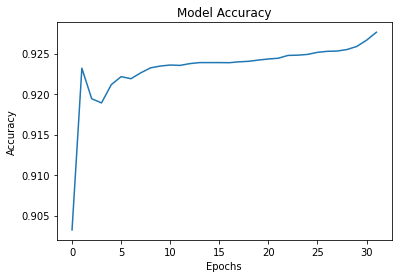

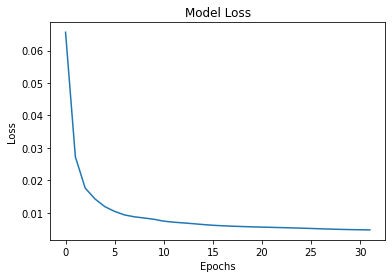

In [15]:
print("AUTOENCODER MODEL")
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [16]:
latent_track_features = encoder.predict(x_train)

In [17]:
latent_track_features.shape

(63274, 8)

In [18]:
latent_track_features_dict = dict()
for ind in tqdm(track_pd.index):
    track_id = track_pd['track_id'][ind]
    latent_features = latent_track_features[ind]
    latent_track_features_dict[track_id] = latent_features

100%|█████████████████████████████████████████████████████████████████████████| 63274/63274 [00:00<00:00, 70806.82it/s]


In [19]:
latent_track_features_df = pd.DataFrame.from_dict(latent_track_features_dict, orient='index')
latent_track_features_df.reset_index(inplace = True)
latent_track_features_df.rename(columns={'index':'track_id'}, inplace=True)
latent_track_features_df.head()

,track_id,0,1,2,3,4,5,6,7
0,t_3c2c29b5-c738-42c0-83e1-ee0e88ac834d,0.143063,0.024294,0.004624,-0.091005,0.067549,-0.291867,-0.285134,-0.150432
1,t_f48322ca-044e-4069-a797-4fedbbbbb522,-0.053658,-0.043300,0.071140,-0.061014,-0.044522,-0.037636,0.181544,0.003603
2,t_5487f622-5641-43da-b263-d8954845d163,0.030984,0.090996,-0.081795,-0.066444,0.240973,-0.241382,-0.244575,-0.090051
3,t_5f395f25-5236-4cbd-a41d-74b65e253df7,0.219336,0.094216,0.024554,-0.129817,0.134058,-0.223478,-0.103355,0.034922
4,t_081b193b-03bd-4c30-9255-b127ed5d2ad5,-0.068865,-0.148980,0.055289,-0.048050,-0.025559,-0.199426,-0.077340,-0.000362


In [20]:
latent_track_features_df.shape

(63274, 9)

In [21]:
latent_track_features_df.to_csv(r'D:\Recommendation RL\Code\Data\latent_track_features.csv', index=False)

In [22]:
encoder.save('D:\Recommendation RL\Code\Data\pickle\encoder.h5')

In [24]:
autoencoder.save('D:\Recommendation RL\Code\Data\pickle\autoencoder.h5')